<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifier%20-%20Land-use%20%2B%20weather%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## Install Monk


## Using pretrained model for Amazon - Planet understanding dataset


## Training a classifier from scratch

<a id='0'></a>
# Install Monk

## Using pip (Recommended)

  - colab (gpu) 
      - All bakcends: `pip install -U monk-colab`
      

  - kaggle (gpu) 
      - All backends: `pip install -U monk-kaggle`
      

  - cuda 10.2	
      - All backends: `pip install -U monk-cuda102`
      - Gluon bakcned: `pip install -U monk-gluon-cuda102`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda102`
      - Keras backend: `pip install -U monk-keras-cuda102`
      

  - cuda 10.1	
      - All backend: `pip install -U monk-cuda101`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda101`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda101`
	  - Keras backend: `pip install -U monk-keras-cuda101`
      

  - cuda 10.0	
      - All backend: `pip install -U monk-cuda100`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda100`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda100`
	  - Keras backend: `pip install -U monk-keras-cuda100`
      

  - cuda 9.2	
      - All backend: `pip install -U monk-cuda92`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda92`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda92`
	  - Keras backend: `pip install -U monk-keras-cuda92`
      

  - cuda 9.0	
      - All backend: `pip install -U monk-cuda90`
	  - Gluon bakcned: `pip install -U monk-gluon-cuda90`
	  - Pytorch backend: `pip install -U monk-pytorch-cuda90`
	  - Keras backend: `pip install -U monk-keras-cuda90`
      

  - cpu 		
      - All backend: `pip install -U monk-cpu`
	  - Gluon bakcned: `pip install -U monk-gluon-cpu`
	  - Pytorch backend: `pip install -U monk-pytorch-cpu`
	  - Keras backend: `pip install -U monk-keras-cpu`

## Install Monk Manually (Not recommended)
 
### Step 1: Clone the library
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 
 
 
### Step 2: Install requirements 
 - Linux
     - Cuda 9.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu90.txt`
     - Cuda 9.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu92.txt`
     - Cuda 10.0
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu100.txt`
     - Cuda 10.1
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu101.txt`
     - Cuda 10.2
         - `cd monk_v1/installation/Linux && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Linux && pip install -r requirements_cpu.txt`
 
 
  - Windows
     - Cuda 9.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu90.txt`
     - Cuda 9.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu92.txt`
     - Cuda 10.0 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu100.txt`
     - Cuda 10.1 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu101.txt`
     - Cuda 10.2 (Experimental support)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cu102.txt`
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Windows && pip install -r requirements_cpu.txt`
         
         
  - Mac
     - CPU (Non gpu system)
         - `cd monk_v1/installation/Mac && pip install -r requirements_cpu.txt`
         
         
  - Misc
      - Colab (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_colab.txt`
      - Kaggle (GPU)
          - `cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt`
 
 
 
### Step 3: Add to system path (Required for every terminal or kernel run)
 - `import sys`
 - `sys.path.append("monk_v1/");`

# Training custom classifier from scratch

## Table of Contents


## [0. Download Dataset](#0)


## [1. Install Monk](#1)


## [2. Train a multi-label classifier](#2)


## [3. Run Inference on multiple images](#3)


## [4. Validate the trained classifier](#4)


## [5. Run Inference on Test dataset for submission in competition](#5)

<a id='0'></a>
# Dataset Details

- Credits: https://www.kaggle.com/c/planet-understanding-the-amazon-from-space

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=12ia20erQXTmJTk1zj1pZ_VeCPViyAQvm' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=12ia20erQXTmJTk1zj1pZ_VeCPViyAQvm" -O satellite_cls.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq satellite_cls.zip

<a id='1'></a>
# Train the classifier

## Imports

In [1]:
import os
import sys
sys.path.append("monk_v1/monk/");

In [15]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

In [16]:
#Create project and experiment
ptf = prototype(verbose=1);
ptf.Prototype("sample-project-1", "sample-experiment-1");

Mxnet Version: 1.5.0

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.4_multilabel/workspace/sample-project-1/sample-experiment-1/



## Dataset folder structure

    parent_directory
        |
        |
        |------train (folder can be named anything)
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |
        |------train_labels.csv (file can be named anything)
        
        
    train_labels.csv has 2 columns (column names could be anything)
        - ID                 | Labels
          img1.jpg           |  agriculture cloudy
          img2.jpg           |  forest hazy
          img3.jpg           |  road forest rains
          img4.jpg           |  city
                ..... (and so on)
                
### In similar fashion you can structure your own dataset

In [17]:
#Set data parameters

ptf.Dataset_Params(dataset_path="satellite_cls/train-jpg",
                   path_to_csv="satellite_cls/train.csv",
                   
                   
                   delimiter = " ",
                   
                   
                   split=0.9,
                   input_size=224, 
                   batch_size=16, 
                   shuffle_data=True,
                   num_processors=3);

Dataset Details
    Train path:     satellite_cls/train-jpg
    Val path:       None
    CSV train path: satellite_cls/train.csv
    CSV val path:   None
    Label Type:     multiple

Dataset Params
    Input Size:   224
    Batch Size:   16
    Data Shuffle: True
    Processors:   3
    Train-val split:   0.9
    Delimiter:    



In [18]:
#Apply data transformations
ptf.apply_random_horizontal_flip(train=True, val=True);
ptf.apply_normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], train=True, val=True, test=True);

In [19]:
#Load dataset
ptf.Dataset();

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.5}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 36431
    Num val images:   4048
    Num classes:      17



In [20]:
# List classes
ptf.system_dict["dataset"]["params"]["classes"]

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [21]:
# Set model parameters
ptf.Model_Params(model_name="resnet18_v1", freeze_base_network=False, use_gpu=True, use_pretrained=True);

Model Params
    Model name:           resnet18_v1
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False



In [22]:
# Load model
ptf.Model();

Model Details
    Loading pretrained model
    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable layers:  41
        Num of actual trainable layers:       41



In [23]:
#ptf.Visualize_With_Netron(data_shape=(3, 224, 224))

In [24]:
# Set Training parameters
ptf.Training_Params(num_epochs=10, display_progress=True, display_progress_realtime=True, 
                    save_intermediate_models=False, 
                    intermediate_model_prefix="intermediate_model_", save_training_logs=True);

Training params
    Num Epochs: 10

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  False



In [25]:
#optimizer
ptf.optimizer_rmsprop(0.001);

Optimizer
    Name:          rmsprop
    Learning rate: 0.001
    Params:        {'lr': 0.001, 'epsilon': 1e-08, 'decay_rate': 0.99, 'weight_decay': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}




In [26]:
#learning rate scheduler
ptf.lr_fixed();

Learning rate scheduler
    Name:   fixed
    Params: {}



In [27]:
#Loss function
ptf.loss_sigmoid_binary_crossentropy()

Loss
    Name:          sigmoidbinarycrossentropy
    Params:        {'weight': None, 'batch_axis': 0}



In [28]:
#Start Training
ptf.Train();

Training Start
    Epoch 1/10
    ----------




    curr_lr - 0.001
    [Epoch 1] Train-acc: 0.731, Train-loss: 0.169 | Val-acc: 0.779669, Val-loss: 0.145, | time: 293.6 sec

    Epoch 2/10
    ----------




    curr_lr - 0.001
    [Epoch 2] Train-acc: 0.804, Train-loss: 0.131 | Val-acc: 0.802343, Val-loss: 0.126, | time: 192.0 sec

    Epoch 3/10
    ----------




    curr_lr - 0.001
    [Epoch 3] Train-acc: 0.825, Train-loss: 0.118 | Val-acc: 0.835291, Val-loss: 0.113, | time: 191.6 sec

    Epoch 4/10
    ----------




    curr_lr - 0.001
    [Epoch 4] Train-acc: 0.839, Train-loss: 0.110 | Val-acc: 0.839401, Val-loss: 0.115, | time: 192.9 sec

    Epoch 5/10
    ----------




    curr_lr - 0.001
    [Epoch 5] Train-acc: 0.847, Train-loss: 0.104 | Val-acc: 0.850007, Val-loss: 0.107, | time: 192.9 sec

    Epoch 6/10
    ----------




    curr_lr - 0.001
    [Epoch 6] Train-acc: 0.854, Train-loss: 0.100 | Val-acc: 0.854403, Val-loss: 0.106, | time: 189.7 sec

    Epoch 7/10
    ----------




    curr_lr - 0.001
    [Epoch 7] Train-acc: 0.861, Train-loss: 0.096 | Val-acc: 0.848009, Val-loss: 0.104, | time: 189.9 sec

    Epoch 8/10
    ----------




    curr_lr - 0.001
    [Epoch 8] Train-acc: 0.865, Train-loss: 0.094 | Val-acc: 0.846569, Val-loss: 0.102, | time: 190.4 sec

    Epoch 9/10
    ----------




    curr_lr - 0.001
    [Epoch 9] Train-acc: 0.868, Train-loss: 0.091 | Val-acc: 0.852552, Val-loss: 0.102, | time: 189.5 sec

    Epoch 10/10
    ----------




    curr_lr - 0.001
    [Epoch 10] Train-acc: 0.874, Train-loss: 0.088 | Val-acc: 0.860147, Val-loss: 0.102, | time: 189.1 sec

    Training completed in: 33m 27s
    Best val Acc:          0.860147

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.4_multilabel/workspace/sample-project-1/sample-experiment-1/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.4_multilabel/workspace/sample-project-1/sample-experiment-1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation cur

<Figure size 432x288 with 0 Axes>

<a id='3'></a>
# Inferencing on images

In [29]:
#Imports 

from monk.gluon_prototype import prototype

In [31]:
# Load experiment in evaluation and inferencing mode

ptf = prototype(verbose=1);
ptf.Prototype("sample-project-1", "sample-experiment-1", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/sample-project-1/sample-experiment-1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.4_multilabel/workspace/sample-project-1/sample-experiment-1/



Prediction
    Image name:         satellite_cls/train-jpg/train_30.jpg
    Predicted classes:      ['clear', 'primary', 'water']
    Predicted scorees:      [0.9982575040940194, 0.9999902510529262, 0.9999069528766978]



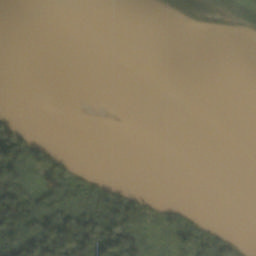

In [37]:
img_name = "satellite_cls/train-jpg/train_30.jpg";
predictions = ptf.Infer(img_name=img_name, return_raw=True, img_thresh=0.6);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         satellite_cls/train-jpg/train_130.jpg
    Predicted classes:      ['partly_cloudy', 'primary']
    Predicted scorees:      [0.999910872426129, 0.9999973515255756]



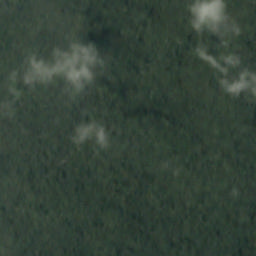

In [38]:
img_name = "satellite_cls/train-jpg/train_130.jpg";
predictions = ptf.Infer(img_name=img_name, return_raw=True, img_thresh=0.6);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         satellite_cls/train-jpg/train_31980.jpg
    Predicted classes:      ['agriculture', 'habitation', 'partly_cloudy', 'primary', 'road']
    Predicted scorees:      [0.8769361192780332, 0.9833172677677673, 0.9709113438949464, 0.9942822830212826, 0.8541003232227373]



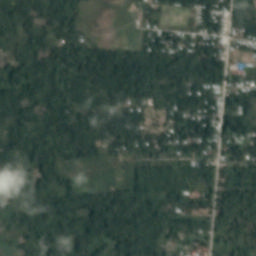

In [52]:
img_name = "satellite_cls/train-jpg/train_31980.jpg";
predictions = ptf.Infer(img_name=img_name, return_raw=True, img_thresh=0.6);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         satellite_cls/train-jpg/train_1280.jpg
    Predicted classes:      ['agriculture', 'partly_cloudy', 'primary']
    Predicted scorees:      [0.992110580083467, 0.9994646360198058, 0.9999358663425848]



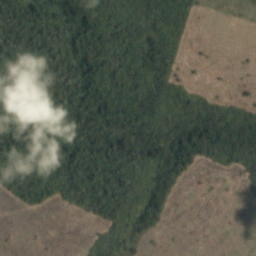

In [41]:
img_name = "satellite_cls/train-jpg/train_1280.jpg";
predictions = ptf.Infer(img_name=img_name, return_raw=True, img_thresh=0.6);
from IPython.display import Image
Image(filename=img_name)

Prediction
    Image name:         satellite_cls/train-jpg/train_14550.jpg
    Predicted classes:      ['clear', 'primary']
    Predicted scorees:      [0.9968663470853034, 0.9999868961688394]



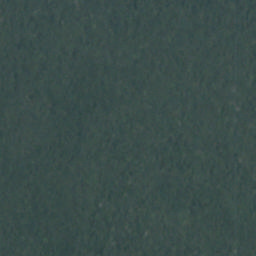

In [47]:
img_name = "satellite_cls/train-jpg/train_14550.jpg";
predictions = ptf.Infer(img_name=img_name, return_raw=True, img_thresh=0.6);
from IPython.display import Image
Image(filename=img_name)

In [55]:
## Inference on images in folder

img_dir = "satellite_cls/test_small";
predictions = ptf.Infer(img_dir=img_dir, return_raw=True, img_thresh=0.6);

Prediction
    Dir path:           satellite_cls/test_small
    Total Images:       14
Processing Images


<a id='4'></a>
# Validation on same training set

In [56]:
#Imports 
from monk.luon_prototype import prototype

In [57]:
# Load experiment in inference mode
ptf = prototype(verbose=1);
ptf.Prototype("sample-project-1", "sample-experiment-1", eval_infer=True);

Mxnet Version: 1.5.0

Model Details
    Loading model - workspace/sample-project-1/sample-experiment-1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.4_multilabel/workspace/sample-project-1/sample-experiment-1/



In [59]:
ptf.Dataset_Params(dataset_path="satellite_cls/train-jpg/",
                  path_to_csv="satellite_cls/train.csv",
                  delimiter=" ");

ptf.Dataset();

Dataset Details
    Test path:      satellite_cls/train-jpg/
    CSV test path:  satellite_cls/train.csv

Dataset Params
    Input Size:  224
    Processors:   3
    Delimiter:    

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 40479
    Num classes:      17



In [60]:
# Run validation
accuracy, class_based_accuracy = ptf.Evaluate();

Testing



    Result
        class based accuracies
            0. agriculture - 82.50913520097443 %
            1. artisinal_mine - 64.60176991150442 %
            2. bare_ground - 9.860788863109049 %
            3. blooming - 6.927710843373494 %
            4. blow_down - 0.0 %
            5. clear - 98.70563821181105 %
            6. cloudy - 86.88367640019148 %
            7. conventional_mine - 50.0 %
            8. cultivation - 48.06790261335716 %
            9. habitation - 57.84153005464481 %
            10. haze - 64.59028550241008 %
            11. partly_cloudy - 87.31579672221457 %
            12. primary - 98.8270732812625 %
            13. road - 84.06641060587287 %
            14. selective_logging - 24.41176470588235 %
            15. slash_burn - 0.0 %
            16. water - 71.83915800836594 %
        total labels:            116205
        num correct predictions: 102032
        Average accuracy (%):    87.80345079815842



<a id='5'></a>
# Run Inference on Test dataset for submission in competition

In [61]:
#Imports

from monk.gluon_prototype import prototype

In [62]:
# Load experiment in inference mode

ptf = prototype(verbose=0);
ptf.Prototype("sample-project-1", "sample-experiment-1", eval_infer=True);

In [64]:
test_imgs = os.listdir("satellite_cls/test-jpg");

In [65]:
test_imgs[0]

'test_8731.jpg'

In [66]:
combined = [];
from tqdm import tqdm_notebook as tqdm
for i in tqdm(range(len(test_imgs))):
    img_name = "satellite_cls/test-jpg/" + test_imgs[i];
    predictions = ptf.Infer(img_name=img_name, return_raw=False, img_thresh=0.5);
    
    wr = "";
    for j in range(len(predictions["predicted_classes"])):
        wr += predictions["predicted_classes"][j] + " ";
    
    wr = wr[:len(wr) - 1]
    combined.append([test_imgs[i].split(".")[0], wr])

In [67]:
test_imgs = os.listdir("satellite_cls/test-jpg-additional");
for i in tqdm(range(len(test_imgs))):
    img_name = "satellite_cls/test-jpg-additional/" + test_imgs[i];
    predictions = ptf.Infer(img_name=img_name, return_raw=False, img_thresh=0.5);
    
    wr = "";
    for j in range(len(predictions["predicted_classes"])):
        wr += predictions["predicted_classes"][j] + " ";
    
    wr = wr[:len(wr) - 1]
    combined.append([test_imgs[i].split(".")[0], wr])

In [68]:
combined[:5], len(combined)

([['test_8731', 'clear primary'],
  ['test_13450', 'clear cultivation primary'],
  ['test_21167', 'clear primary'],
  ['test_30717', 'clear primary'],
  ['test_473', 'clear habitation primary road water']],
 61191)

In [69]:
import pandas as pd
df = pd.DataFrame(combined, columns = ['image_name', 'tags'])

In [71]:
df.to_csv("submission.csv", index=False);

## Submit the file here - https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/submit

## Achived score - 0.89032/1